# Loan Portfolio Analysis
## by Nashwa Shafik

## Investigation Overview

> When studying the loans business, we want to make sure that loans installments are paid at time. So, we want to investigate the factors that can cause loans to default, completed or being past due.<br>
> As a loan business, we not only decide to accept or refuse the loan request, but we also need to determine the suitable interest rate.<br>
> So let's first see what data we have, its major characteristics and then check the features that affect loan completion and borrower annual percentage rate.

## Dataset Overview

> The data set contains 113061 loans issued from Prosper lending company from November 2005 to March 2014.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned_loans.csv')
df.head()

,Unnamed: 0,Term,LoanStatus,BorrowerAPR,Occupation,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,ProsperScore,MonthlyLoanPayment,IncomeVerifiable,ListingCategory,Year,LStatus,AmountRange,LoanIncomeRatio
0,0,36,Completed,0.16516,Other,Self-employed,True,3083.333333,9425,NaN,330.43,True,Not Available,2007,Completed,"(8000.0, 10000.0]",0.107166
1,1,36,Current,0.12016,Professional,Employed,False,6125.000000,10000,7.0,318.93,True,Home Improvement,2014,Current,"(8000.0, 10000.0]",0.052070
2,2,36,Completed,0.28269,Other,Not available,False,2083.333333,3001,NaN,123.32,True,Not Available,2007,Completed,"(2000.0, 4000.0]",0.059194
3,3,36,Current,0.12528,Skilled Labor,Employed,True,2875.000000,10000,9.0,321.45,True,Motorcycle,2012,Current,"(8000.0, 10000.0]",0.111809
4,4,36,Current,0.24614,Executive,Employed,True,9583.333333,15000,4.0,563.97,True,Home Improvement,2013,Current,"(14000.0, 16000.0]",0.058849


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loans by Issuing Year

> First lets see our loan counts by issuing year. As the first and last year only have data for few months, we exclude them from observing trends. A dramatic drop in loans count appears in year 2009, then a positive trend is clear since then.

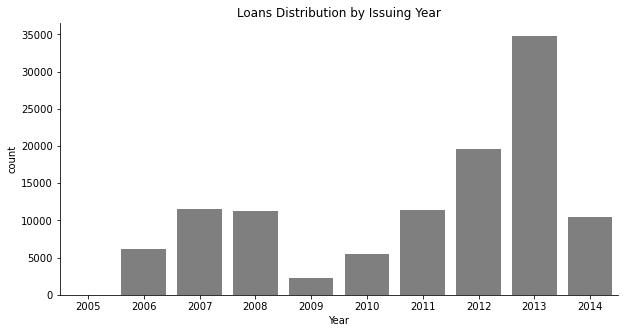

In [21]:
clr = sb.color_palette()[7]
year_ord = df.Year.sort_values().unique()
plt.figure(figsize = (10,5))
sb.countplot(data = df, x='Year', color = clr, order = year_ord)
plt.title('Loans Distribution by Issuing Year')
sb.despine(top=True, right= True);

## Loans by Loans Status

> Now let's see the counts of loans by loan status. Of the closed loans, about one third were defaulted and two thirds were completed. This is a high ratio that needs to be reduced. But the good news is that the open loans seem to be good as the ratio of loans at risk to the current loans is small.

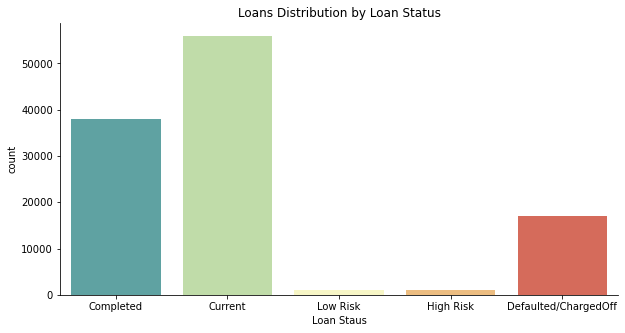

In [25]:
lstatus = ['Completed', 'Current', 'Low Risk', 'High Risk', 'Defaulted/ChargedOff']
plt.figure(figsize = (10,5))
sb.countplot(data = df, x='LStatus', palette = 'Spectral_r', order = lstatus)
plt.title('Loans Distribution by Loan Status')
plt.xlabel('Loan Staus')
sb.despine(top=True, right= True);

## Ratio of Monthly Payment to Monthly Income
> One of the most factors that affect the loan completion is the ratio between the scheduled monthly payment to the stated monthly income. Increase in this ratio leads to increased probability of defaulting the loan. The good news is that this ratio is much smaller in average in currently open loans.


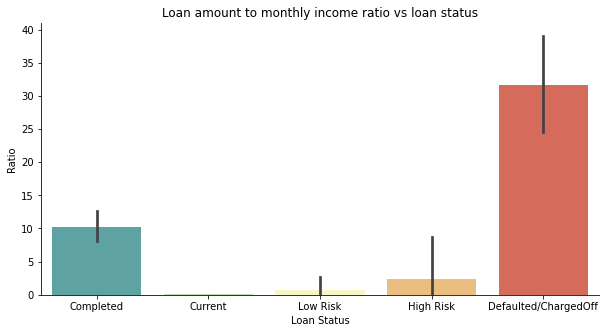

In [53]:
plt.figure(figsize=(10,5))
sb.barplot(data = df[df.StatedMonthlyIncome!=0 ], x = 'LStatus', y='LoanIncomeRatio', order = lstatus, palette = 'Spectral_r')
plt.xlabel('Loan Status')
plt.ylabel('Ratio')
plt.title('Loan amount to monthly income ratio vs loan status')
sb.despine(top=True, right= True);

## Average Borrower Annual Percentage Rate by Loan Status
> Anthother factor that strongly affects the loan completion is the borrowers APR. As this rate increases, the probability of loan default increases. 



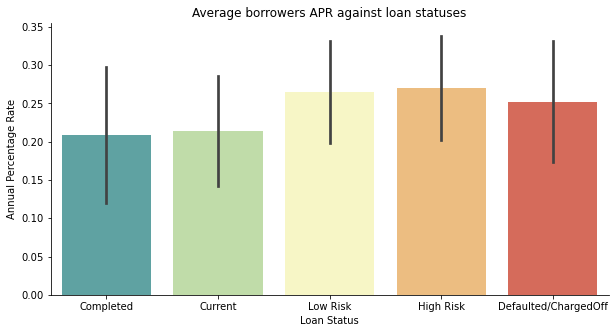

In [55]:
plt.figure(figsize=(10,5))
sb.barplot(data = df, x = 'LStatus', y= 'BorrowerAPR', ci = 'sd', palette = 'Spectral_r', order = lstatus)
plt.title ('Average borrowers APR against loan statuses')
plt.xlabel('Loan Status')
plt.ylabel('Annual Percentage Rate')
sb.despine(top=True, right= True);

## Prosper Score by Loan Status
> In spite of the large variations in prosper scores for different loan statuses, it tends to be smaller for defaulted loans and loans at risk.


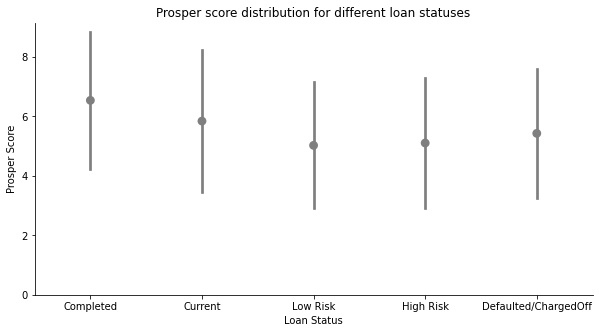

In [56]:
plt.figure(figsize = (10,5))
ax =sb.pointplot(data = df, x= 'LStatus', y = 'ProsperScore', ci = 'sd' , join = False, order = lstatus, color = clr)
plt.title ('Prosper score distribution for different loan statuses') 
plt.ylabel('Prosper Score')
ax.set_ylim(ymin=0)
plt.xlabel('Loan Status')

sb.despine(top=True, right= True);

## Distribution of borrowers Annual Percentage Ratio (APR)
> Now let's investigate the distribution of APR and the factors affecting it. The annual percentage rate varies from about 0.007 to 0.512 with a mean of 0.219. There are multiple peaks around 0.17, 0.21 and 0.36 with most of values concentrated around the mean while the largest number have a rate of about 0.36.

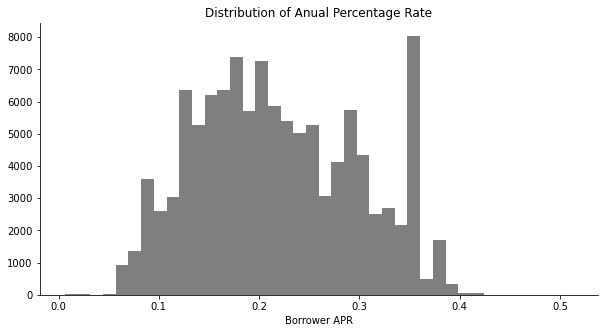

In [57]:
plt.figure(figsize = (10,5))
plt.hist(data = df[df.BorrowerAPR.isnull()== False], x= 'BorrowerAPR', bins = 40, color = clr)
plt.xlabel('Borrower APR')
plt.title('Distribution of Anual Percentage Rate')
sb.despine(top=True, right= True);

## Prosper score relation to borrower's APR
> The Prosper score has a clear effect on setting the borrower's rate. As it increases, the APR decreases.


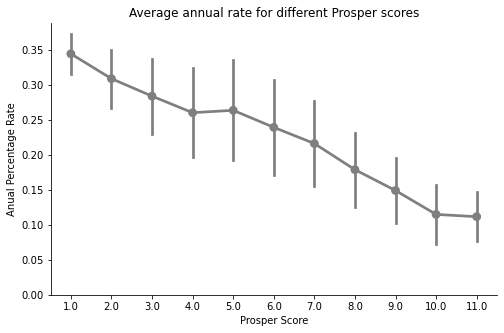

In [58]:
plt.figure(figsize = (8,5))
ax =sb.pointplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', color = clr, ci = 'sd')
plt.title('Average annual rate for different Prosper scores')
plt.xlabel('Prosper Score')
ax.set_ylim(ymin=0)
plt.ylabel('Anual Percentage Rate')

sb.despine(top=True, right= True);

## Loan amount vs borrowers APR
> Although there is a large variation of loan amounts for different borrower rates, there is a tendency to decrease the rate with higher loan amounts.

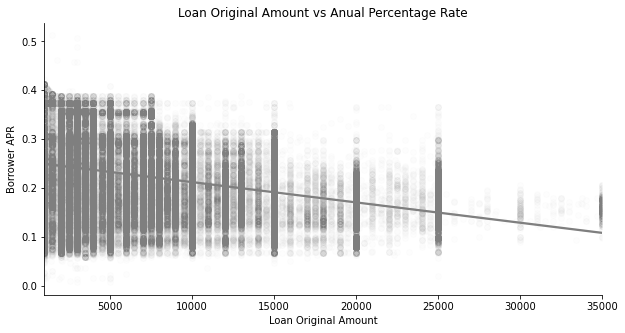

In [59]:
plt.figure(figsize = (10,5))
sb.regplot(data = df, x = 'LoanOriginalAmount',y= 'BorrowerAPR', scatter_kws={'alpha':0.01}, color = clr)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title ('Loan Original Amount vs Anual Percentage Rate')
sb.despine(top=True, right= True);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!